In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from IPython.display import clear_output

In [5]:
df = pd.read_csv("crash-monroe.csv", encoding='windows-1252')
df

,Master Record Number,Agency,Local Code,County,Township,City,Collision Date,Collision Time,Vehicles Involved,Trailers Involved,...,Damage Estimate,Manner of Collision,Time Notified,Time Arrived,Investigation Complete?,Photos Taken?,Unique Location Id,State Property Damage?,Traffic Control,NARRATIVE
0,903289180,BLOOMINGTON PD,B1900016,MONROE,BLOOMINGTON,BLOOMINGTON,1/1/2019,1:50 AM,2,0.0,...,$1001 TO $2500,OPPOSITE DIRECTION SIDESWIPE,150,155,N,Y,7THSTWALNUTST,0,NONE,On January 1st 2019 at approximately 01:50AM I...
1,903289429,BLOOMINGTON PD,B1900080,MONROE,BLOOMINGTON,BLOOMINGTON,1/1/2019,6:39 PM,2,0.0,...,$1001 TO $2500,REAR END,639,650,Y,Y,E1OTHSTNPETEELLISDR,0,TRAFFIC CONTROL SIGNAL,V1 and V2 were traveling W/B on 10th St approa...
2,903289340,INDIANA UNIV BLOOMINGTON PD,190001,MONROE,BLOOMINGTON,BLOOMINGTON,1/1/2019,12:47 PM,1,0.0,...,$1001 TO $2500,OTHER - EXPLAIN IN NARRATIVE,1251,1253,Y,Y,7THSTJORDANAVE,1,STOP SIGN,Assisting Officer: Mark Norris #38. He spoke w...
3,903289285,BLOOMINGTON PD,B1900040,MONROE,BLOOMINGTON,BLOOMINGTON,1/1/2019,8:00 AM,1,0.0,...,UNDER $1001,RAN OFF ROAD,1005,1014,Y,N,ECONVENANTERDR,0,NONE,"Property Owner, Trenton Jones, noticed that a ..."
4,903291376,MONROE SD,M19A15,MONROE,BLOOMINGTON,BLOOMINGTON,1/1/2019,4:55 AM,1,0.0,...,$10001 TO $25000,RAN OFF ROAD,458,502,Y,Y,ARLINGTONRDRAJUMIST,0,LANE CONTROL,Spoke to D1 and could detect the odor of an al...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3843,903517221,BLOOMINGTON PD,B1953997,MONROE,BLOOMINGTON,BLOOMINGTON,12/30/2019,7:46 PM,1,0.0,...,$1001 TO $2500,RAN OFF ROAD,746,748,Y,Y,EAZALEALN,0,NONE,V1 WAS TRAVELING EB ON E AZALEA LN FLEEING FRO...
3844,903516367,ELLETTSVILLE PD,E1907108,MONROE,RICHLAND,ELLETTSVILLE,12/30/2019,6:34 PM,2,0.0,...,$10001 TO $25000,REAR END,635,640,Y,Y,LAKEVIEWDRSR46E,0,LANE CONTROL,Driver 1 was traveling east bound on SR 46 in ...
3845,903516563,BLOOMINGTON PD,B1954044,MONROE,RICHLAND,BLOOMINGTON,12/31/2019,8:30 AM,2,0.0,...,$5001 TO $10000,RIGHT ANGLE,840,845,Y,N,46BYPMONROEST,0,STOP SIGN,D1 stated she was sitting at the stop sign at ...
3846,903516555,INDIANA UNIV BLOOMINGTON PD,193074,MONROE,BLOOMINGTON,BLOOMINGTON,12/31/2019,7:15 AM,2,0.0,...,$5001 TO $10000,SAME DIRECTION SIDESWIPE,718,722,Y,N,NHEADLEYRDSR46,0,LANE CONTROL,V1 was traveling southeast on SR 45/46 approac...


In [6]:
all_data = ["Township", "City", "Collision Date", "Collision Time", "Vehicles Involved", "Trailers Involved", "Number Injured", "Number Dead", "Roadway Name", "Direction", "Road Character"]
kmean = ["Time Notified", "Time Arrived"]
df_info = df.dropna(subset=all_data)
show_data = df_info[all_data].copy()
show_data

,Township,City,Collision Date,Collision Time,Vehicles Involved,Trailers Involved,Number Injured,Number Dead,Roadway Name,Direction,Road Character
0,BLOOMINGTON,BLOOMINGTON,1/1/2019,1:50 AM,2,0.0,0.0,0.0,WALNUT,N,STRAIGHT/LEVEL
4,BLOOMINGTON,BLOOMINGTON,1/1/2019,4:55 AM,1,0.0,1.0,0.0,ARLINGTON,W,CURVE/GRADE
8,BLOOMINGTON,BLOOMINGTON,1/2/2019,10:27 AM,1,0.0,0.0,0.0,INDIANA,S,STRAIGHT/LEVEL
21,VAN BUREN,BLOOMINGTON,1/4/2019,8:55 AM,2,0.0,0.0,0.0,CURRY,N,STRAIGHT/GRADE
22,PERRY,BLOOMINGTON,1/4/2019,5:13 PM,2,0.0,0.0,0.0,1870 SOUTH WALNUT,N,STRAIGHT/LEVEL
...,...,...,...,...,...,...,...,...,...,...,...
3813,CLEAR CREEK,BLOOMINGTON,12/26/2019,2:43 PM,1,0.0,1.0,0.0,SOUTH POINTE RETREAT,S,CURVE/GRADE
3814,VAN BUREN,BLOOMINGTON,12/26/2019,8:44 PM,1,0.0,0.0,0.0,ROCKPORT,S,STRAIGHT/GRADE
3818,RICHLAND,BLOOMINGTON,12/27/2019,9:21 PM,2,0.0,0.0,0.0,FORREST PARK,N,STRAIGHT/LEVEL
3827,PERRY,BLOOMINGTON,12/28/2019,1:15 AM,1,0.0,0.0,0.0,ROGERS,N,STRAIGHT/LEVEL


In [7]:
show_data = show_data.sum()
show_data

Township             BLOOMINGTONBLOOMINGTONBLOOMINGTONVAN BURENPERR...
City                 BLOOMINGTONBLOOMINGTONBLOOMINGTONBLOOMINGTONBL...
Collision Date       1/1/20191/1/20191/2/20191/4/20191/4/20191/4/20...
Collision Time       1:50 AM4:55 AM10:27 AM8:55 AM5:13 PM9:58 PM6:5...
Vehicles Involved                                                 1390
Trailers Involved                                                  6.0
Number Injured                                                   216.0
Number Dead                                                        3.0
Roadway Name         WALNUTARLINGTONINDIANACURRY1870 SOUTH WALNUTSM...
Direction            NWSNNSWSWNNENSEWNSNSENSWSNSWWEWNWSESWNSESWSNWE...
Road Character       STRAIGHT/LEVELCURVE/GRADESTRAIGHT/LEVELSTRAIGH...
dtype: object

In [8]:
show_data.describe()

count                                                    11
unique                                                   11
top       BLOOMINGTONBLOOMINGTONBLOOMINGTONVAN BURENPERR...
freq                                                      1
dtype: object

In [9]:
show_data.mode()

c:\Users\ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:964: UserWarning: Unable to sort modes: '<' not supported between instances of 'numpy.ndarray' and 'str'
  warn(f"Unable to sort modes: {err}")


0     BLOOMINGTONBLOOMINGTONBLOOMINGTONVAN BURENPERR...
1     BLOOMINGTONBLOOMINGTONBLOOMINGTONBLOOMINGTONBL...
2     1/1/20191/1/20191/2/20191/4/20191/4/20191/4/20...
3     1:50 AM4:55 AM10:27 AM8:55 AM5:13 PM9:58 PM6:5...
4                                                  1390
5                                                   6.0
6                                                 216.0
7                                                   3.0
8     WALNUTARLINGTONINDIANACURRY1870 SOUTH WALNUTSM...
9     NWSNNSWSWNNENSEWNSNSENSWSNSWWEWNWSESWNSESWSNWE...
10    STRAIGHT/LEVELCURVE/GRADESTRAIGHT/LEVELSTRAIGH...
dtype: object

In [10]:
df_info = df.dropna(subset=kmean)
kdata = df_info[kmean].copy()
kdata

,Time Notified,Time Arrived
0,150,155
1,639,650
2,1251,1253
3,1005,1014
4,458,502
...,...,...
3843,746,748
3844,635,640
3845,840,845
3846,718,722


In [11]:
def random_centroids(data, k):
    centroids=[]
    for i in range(k):
        centroid =data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [12]:
centroids = random_centroids(kdata,2)
print(centroids)

                    0       1
Time Notified   701.0   225.0
Time Arrived   1038.0  1120.0


In [13]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [14]:
labels = get_labels(kdata,centroids)
labels.value_counts()

0    3088
1     760
dtype: int64

In [15]:
def new_cenroids(data, labels, k):
    data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [16]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteraion{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:1])
    plt.show()

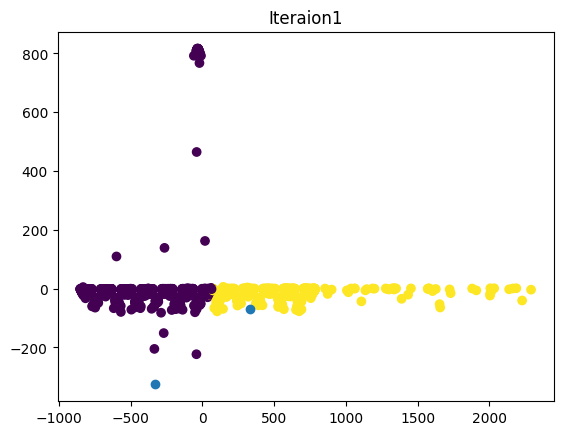

In [17]:
max_iterations = 100
k = 2

centroids = random_centroids(kdata, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(kdata, centroids)
    plot_clusters(kdata, labels, centroids, iteration)
    iteration += 1

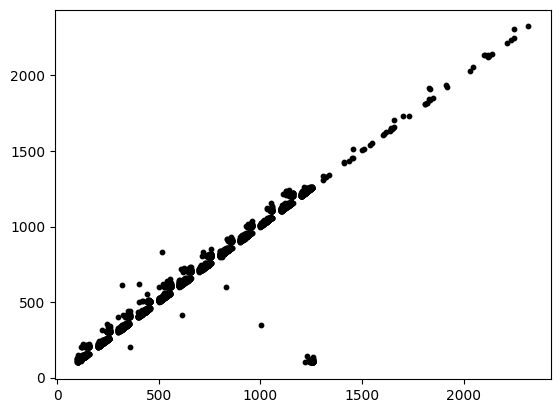

In [18]:
x = kdata.iloc[:, [0, 1]].values
plt.scatter(x[:, 0], x[:, 1], s=10, c="black")

In [19]:
db = DBSCAN(eps = 0.1, min_samples = 10).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

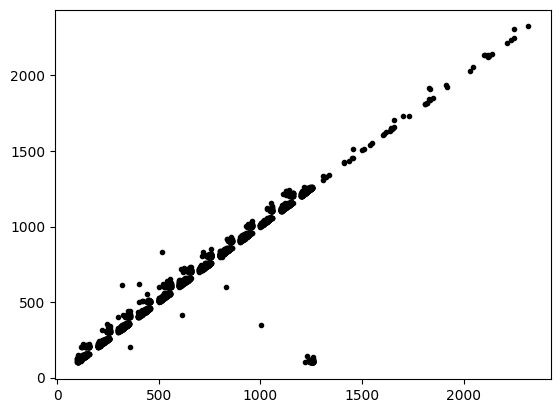

In [20]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=7,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=3,
    )

plt.show()